<a href="https://colab.research.google.com/github/MuhammadIrzam447/visionCodes/blob/master/Titanic_Survived_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Titanic/titanic.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median()).astype(int)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.drop(["Cabin", "SibSp"], axis=1, inplace=True)

In [ ]:
data['Embarked'] = data['Embarked'].fillna('N/A').map({'S': 0, 'C': 1, 'Q': 2, 'N/A': 0}).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
data["Sex"] = label_encoder.fit_transform(data["Sex"])

In [ ]:
import re as r
data['Ticket'] = data['Ticket'].str.split(' ', 1).str[1].where(data['Ticket'].str.contains(' '), data['Ticket'])
data['Ticket'] = data['Ticket'].str.replace(r'\D+', '', regex=True)

<ipython-input-15-514f41dc903b>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['Ticket'] = data['Ticket'].str.split(' ', 1).str[1].where(data['Ticket'].str.contains(' '), data['Ticket'])


In [ ]:
print(data['Ticket'].unique())

In [ ]:
data['Ticket'] = pd.to_numeric(data['Ticket'], errors='coerce').astype('Int64')

In [ ]:
data.info()

<ipython-input-70-89bae11b42ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


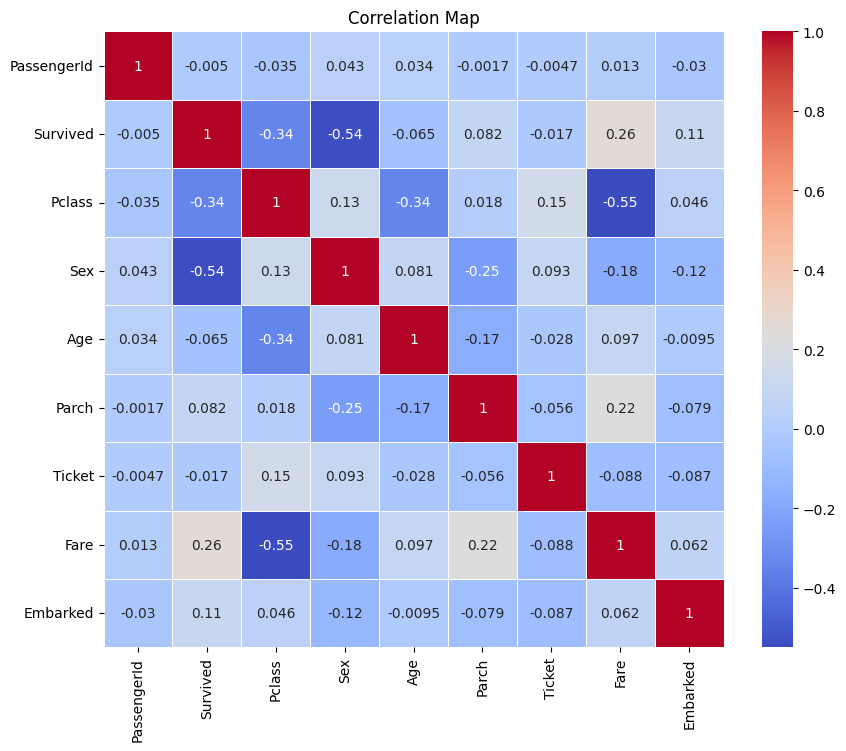

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

In [ ]:
print(data['Parch'].unique())

[0 1 2 5 3 4 6]


In [ ]:
dataTemp = data.copy()

In [ ]:
dataTemp.drop("Name", axis=1, inplace = True)

In [ ]:
y = dataTemp.iloc[:,1]

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X = dataTemp.iloc[:,2:]

In [ ]:
X

,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,3,1,22,0,21171,7.2500,0
1,1,0,38,0,17599,71.2833,1
2,3,0,26,0,3101282,7.9250,0
3,1,0,35,0,113803,53.1000,0
4,3,1,35,0,373450,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27,0,211536,13.0000,0
887,1,0,19,0,112053,30.0000,0
888,3,0,28,2,6607,23.4500,0
889,1,1,26,0,111369,30.0000,1


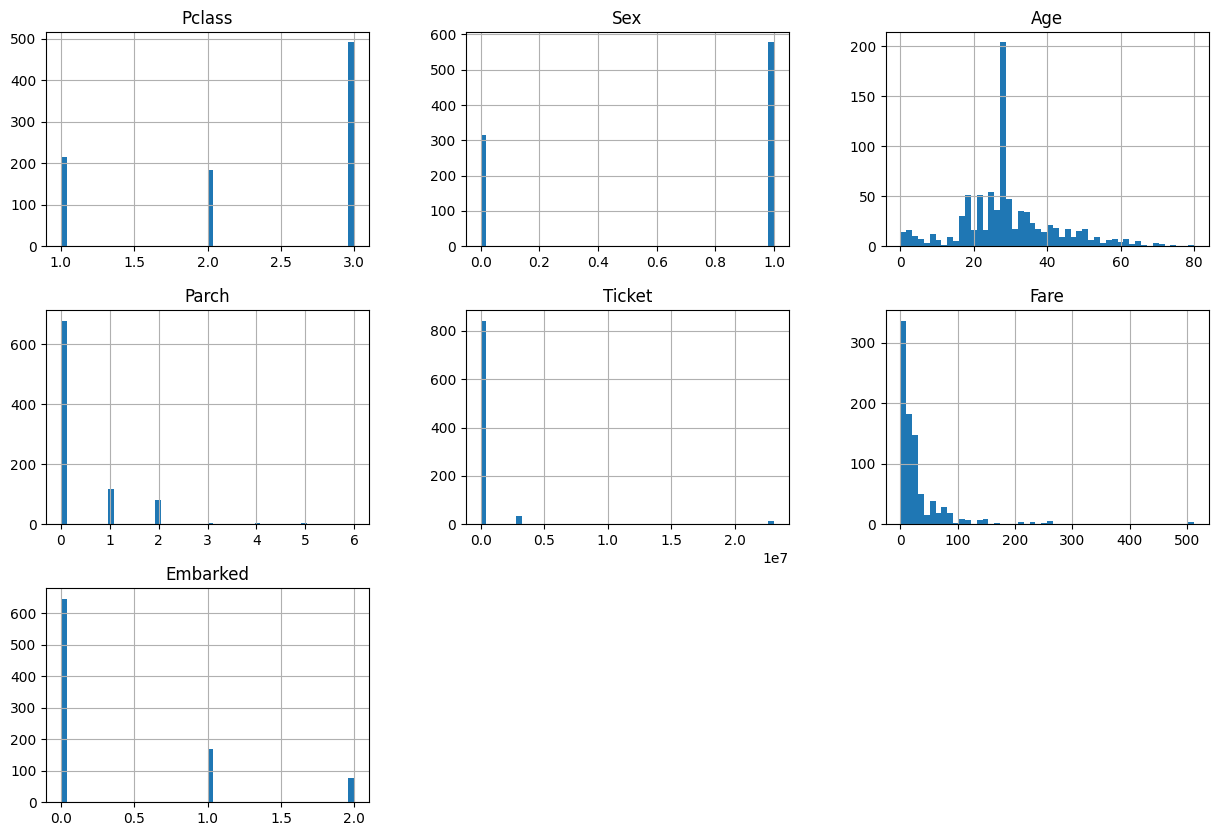

In [ ]:
import matplotlib.pyplot as plt
X.hist(bins = 50, figsize=(15,10))
plt.show()

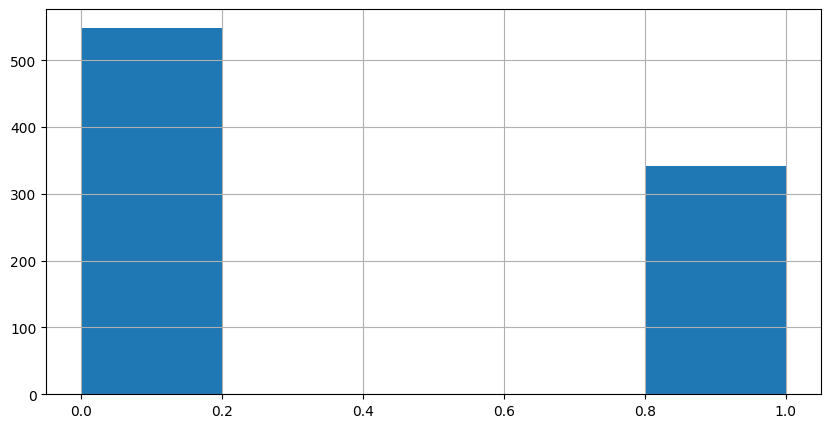

In [ ]:
y.hist(bins= 5, figsize=(10,5))
plt.show()

In [ ]:
X.head()

,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,3,1,22,0,21171,7.2500,0
1,1,0,38,0,17599,71.2833,1
2,3,0,26,0,3101282,7.9250,0
3,1,0,35,0,113803,53.1000,0
4,3,1,35,0,373450,8.0500,0


In [ ]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Ticket      4
Fare        0
Embarked    0
dtype: int64

In [ ]:
# It converts the dataframe intto ndarray 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X[["Ticket"]])

SimpleImputer(strategy='median')

In [ ]:
X["Ticket"] = imputer.fit_transform(X[["Ticket"]])

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(Xnew,y, test_size=0.2, random_state=42)

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = classifier.score(X_test, y_test)

In [ ]:
print(accuracy)

0.8100558659217877


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



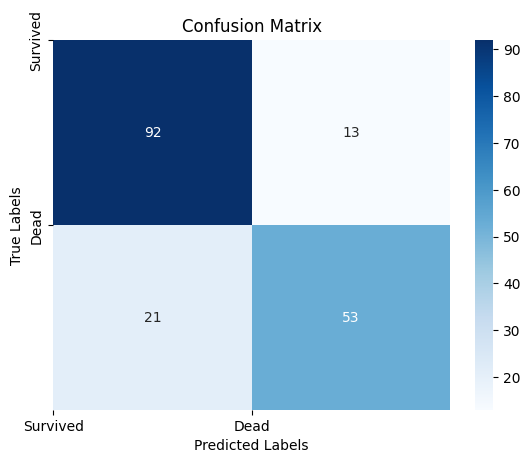

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# Set labels, title, and axis ticks
classes = ["Survived", "Dead"]
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)

# Display the plot
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [600, 700, 800],
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 600}


In [ ]:
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

In [ ]:
accuracy = best_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8324022346368715


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8324022346368715
Precision: 0.84375
Recall: 0.7297297297297297
F1 Score: 0.7826086956521738


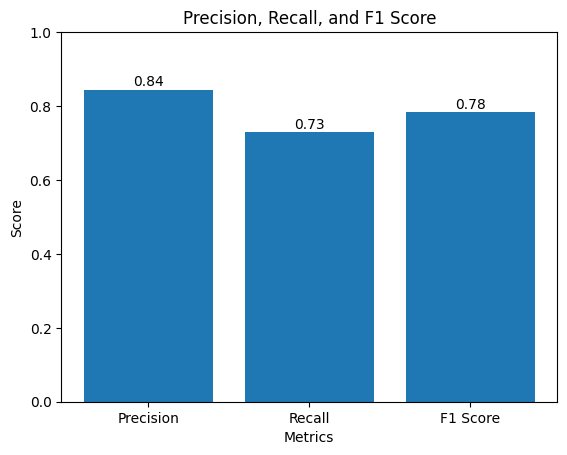

In [ ]:
# Create a bar plot to visualize precision, recall, and F1 score
labels = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.bar(labels, values)
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Display the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Show the plot
plt.show()

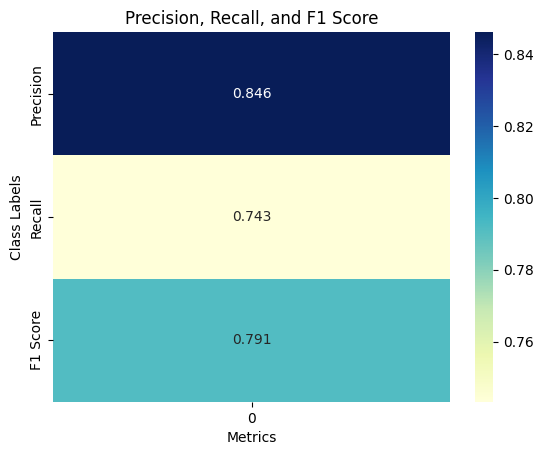

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
score = np.array(values)
df_scores = pd.DataFrame(score, labels)
sns.heatmap(df_scores, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')

# Show the plot
plt.show()

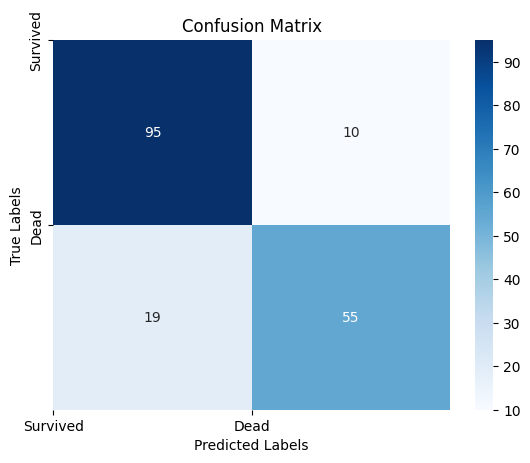

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# Set labels, title, and axis ticks
classes = ["Survived", "Dead"]
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)

# Display the plot
plt.show()

In [ ]:
# Use Pipeline and check if different methods to handle feature can improve performance. Use more greater forest. 
# remove the duplicate values
# Use a scaler to scale the values 

In [ ]:
# Here we are taking the approach of scaling the values of features accoring to the values of the features. 
Xnew = X.copy()
# Xnew can be used to train the GridSearchCV to investigate impact of scaling on model performance 
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler(feature_range=(0, 3))

# Fit the scaler on your DataFrame
scaler.fit(Xnew)

# Scale the values in the DataFrame
Xnew = scaler.transform(Xnew)


In [ ]:
Xnew = pd.DataFrame(Xnew)

In [ ]:
Xnew.head()

In [ ]:
X.head()

In [ ]:
import matplotlib.pyplot as plt
Xnew.hist(bins = 50, figsize=(15,10))
plt.show()